In [1]:
# 相关链接
# SVM及核函数: https://blog.csdn.net/wenqiwenqi123/article/details/79313876
# SVM标记点选择与损失函数: https://blog.csdn.net/wenqiwenqi123/article/details/79314166
# SVM完整推导: https://blog.csdn.net/b285795298/article/details/81977271
# 核技术的使用: https://blog.csdn.net/aspirinvagrant/article/details/45306783

# 线性可分支持向量分类机: 硬分类
# 线性支持向量分类机: 加入松弛因子,对目标函数作惩罚
# 可分支持向量机: 使用kernel,映射到Hilbert空间
# C-支持向量分类机: 映射到H空间后,依然需要软化约束条件

# 参考代码: https://blog.csdn.net/luanpeng825485697/article/details/79809006
# sklearn.svm的API: https://scikit-learn.org/stable/modules/classes.html?highlight=svm#module-sklearn.svm

import numpy as np # 快速操作结构数组的工具
from sklearn import svm  # svm支持向量机
import matplotlib.pyplot as plt # 可视化绘图

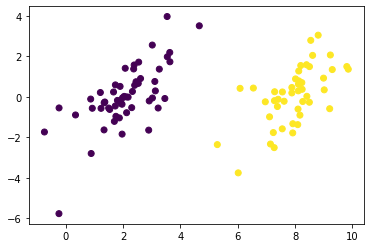

预测结果： [-1. -1.  1.  1.]
支持向量： [[ 3.018896  2.556416]
 [ 3.634009  1.730537]
 [ 0.887835 -2.797792]
 [ 1.696414 -1.212496]
 [ 4.658191  3.507396]
 [ 1.208047  0.2131  ]
 [-0.232542 -0.54769 ]
 [ 3.457096 -0.082216]
 [ 2.074915  1.41055 ]
 [-0.743036 -1.736103]
 [ 3.536555  3.96496 ]
 [ 2.893743 -1.643468]
 [ 0.870296 -0.109952]
 [-0.236713 -5.766721]
 [ 1.336267 -1.632889]
 [ 1.966279 -1.840439]
 [ 8.127113  1.274372]
 [ 7.108772 -0.986906]
 [ 8.197181  1.545132]
 [ 8.015003  0.885325]
 [ 7.916831 -1.781735]
 [ 7.270337 -2.507834]
 [ 8.804461  3.044301]
 [ 5.286862 -2.358286]
 [ 6.080573  0.418886]
 [ 6.016004 -3.753712]
 [ 9.205805 -0.58648 ]
 [ 7.556201  0.241185]
 [ 9.854303  1.365116]]
支持向量索引： [ 1  8 12 14 17 19 28 29 41 42 43 52 59 70 74 76  4  5 18 31 33 36 39 54
 55 57 75 79 90]
支持向量数量： [16 13]
预测结果： [-1. -1.  1.  1.]
预测结果： [-1. -1.  1.  1.]


In [2]:
data_set = np.loadtxt("SVM_data.txt")
train_data = data_set[:,0:2]   # 训练特征空间
train_target = np.sign(data_set[:,2])  # 训练集类标号

test_data = [[3,-1], [1,1], [7,-3], [9,0]] # 测试特征空间
test_target = [-1, -1, 1, 1]  # 测试集类标号

plt.scatter(data_set[:,0],data_set[:,1],c=data_set[:,2])  # 绘制可视化图
plt.show()

# 创建模型
clf = svm.SVC(gamma='auto')
clf.fit(X=train_data, y=train_target,sample_weight=None)  # 训练模型。参数sample_weight为每个样本设置权重。应对非均衡问题
result = clf.predict(test_data)  # 使用模型预测值
print('预测结果：',result)  # 输出预测值[-1. -1.  1.  1.]

# 获得支持向量
print('支持向量：',clf.support_vectors_)
# 获得支持向量的索引
print('支持向量索引：',clf.support_)
# 为每一个类别获得支持向量的数量
print('支持向量数量：',clf.n_support_)


# # ===============================Linear SVM======================
from sklearn.svm import LinearSVC

clf = LinearSVC() # 创建线性可分svm模型，参数均使用默认值
clf.fit(train_data, train_target)  # 训练模型
result = clf.predict(test_data)  # 使用模型预测值
print('预测结果：',result)  # 输出预测值[-1. -1.  1.  1.]


# # ===============================Linear NuSVC======================
from sklearn.svm import NuSVC

clf = NuSVC(gamma='auto') # 创建线性可分svm模型，参数均使用默认值
clf.fit(train_data, train_target)  # 训练模型
result = clf.predict(test_data)  # 使用模型预测值
print('预测结果：',result)  # 输出预测值[-1. -1.  1.  1.]

二分类器个数： 3


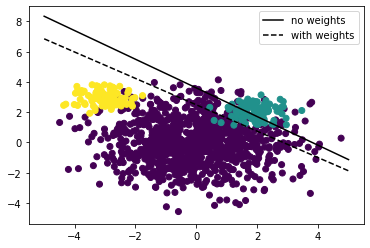

In [3]:
# ===============================样本不平衡、多分类的情况========================
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

# 创建不均衡样本
rng = np.random.RandomState(0)
n_samples_1 = 1000
n_samples_2 = 100
n_samples_3 = 100
X = np.r_[1.5 * rng.randn(n_samples_1, 2), 0.5 * rng.randn(n_samples_2, 2) + [2, 2],0.5 * rng.randn(n_samples_3, 2) + [-3, 3]]  # 三类样本点中心为(1.5,1.5)、(2,2)、(-3,3)
y = [0] * (n_samples_1) + [1] * (n_samples_2)+ [2] * (n_samples_3)  # 前面的1000个为类别0，后面的100个为类别1，最后100个类别为2

# 创建模型获取分离超平面
clf = svm.SVC(decision_function_shape='ovo',kernel='linear', C=1.0)  # decision_function_shape='ovo'为使用1对1多分类处理。会创建n(n-1)/2个二分类。ovr为一对所有的处理方式
clf.fit(X, y)

# 多分类的情况下，获取其中二分类器的个数。
dec = clf.decision_function([[1.5,1.5]])  # decision_function()的功能：计算样本点到分割超平面的函数距离。 包含几个2分类器，就有几个函数距离。
print('二分类器个数：',dec.shape[1])

# 绘制，第一个二分类器的分割超平面
w = clf.coef_[0]
a = -w[0] / w[1]  # a可以理解为斜率. 直线方程是: w[0]*x[0]+w[1]*x[1]+clf.intercept_[0]=0
xx = np.linspace(-5, 5)
yy = a * xx - clf.intercept_[0] / w[1]  # 二维坐标下的直线方程

# 使用类权重，获取分割超平面
wclf = svm.SVC(kernel='linear', class_weight={1: 10})
wclf.fit(X, y)


# 绘制 分割分割超平面
ww = wclf.coef_[0]
wa = -ww[0] / ww[1]
wyy = wa * xx - wclf.intercept_[0] / ww[1]  # 带权重的直线

# 绘制第一个二分类器的分割超平面和样本点
h0 = plt.plot(xx, yy, 'k-', label='no weights')
h1 = plt.plot(xx, wyy, 'k--', label='with weights')
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.legend()

plt.show()